In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [3]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [8]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [9]:
# Find the date of the last data point
lastdate = session.query(measurement.date).order_by(measurement.date.desc()).first().date

lastdate

'2017-08-23'

In [10]:
# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date.fromisoformat(lastdate) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [11]:
# Perform a query to retrieve the data and precipitation scores
sel = [measurement.date,
      measurement.prcp]

last12 = session.query(*sel).\
    filter(measurement.date.between(year_ago, lastdate)).\
    order_by(measurement.date).all()

In [12]:
# Save the query results as a Pandas DataFrame, set the index to the date column, and sort the dataframe by date
last12_df = pd.DataFrame(last12).set_index(['date']).sort_values(by=['date'], ascending = True)
last12_df

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


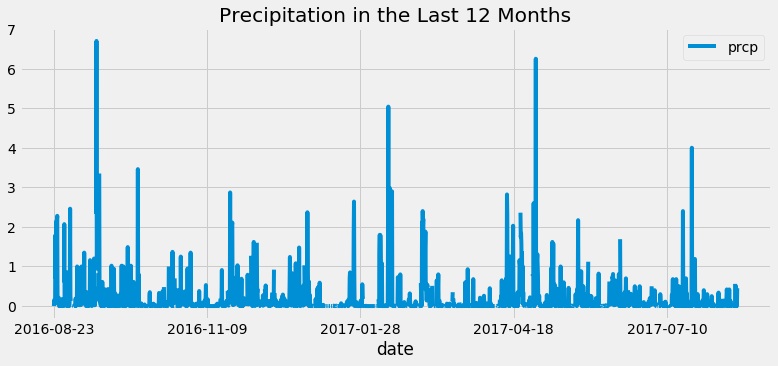

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data 
last12_df.plot(title = "Precipitation in the Last 12 Months", figsize = (12,5))
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data

In [ ]:
# Design a query to show how many stations are available in this dataset


In [ ]:
# What are the most active stations (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [ ]:
# NOTE ONLY
sel = [measurement.date,
      measurement.prcp]

R12 = session.query(*sel).filter



# sel = [Dow.stock, 
#        func.avg(Dow.open_price), 
#        func.avg(Dow.high_price), 
#        func.avg(Dow.low_price), 
#        func.avg(Dow.close_price)]
# may_averages = session.query(*sel).\
#     filter(func.strftime("%m", Dow.date) == "05").\
#     group_by(Dow.stock).\
#     order_by(Dow.stock).all()
# may_averages